In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import ImageFont, ImageDraw, Image, ImageColor
import random as rd
from IPython.display import display
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import os
from skimage import io, transform
import torchvision
import sys

In [5]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import string, random
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  0.4.1
Torchvision Version:  0.2.1


In [12]:
def id_generator(size=6, chars=string.ascii_lowercase + string.digits):
    return ''.join(random.choice(chars) for _ in range(size))

In [269]:
test = pd.read_csv('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\test.csv')

In [270]:
test.head()

card_number date_expire filename first_name  last_name
0  6008821065422827       11/19    0.png       volt      adiad
1  7120613216687772       04/19    1.png  cranceshi    kingley
2  5584257085087350       02/20    2.png   terpstra  bouloukos
3  1868459928864512       07/19    3.png   abimelec   kauhanen
4  1340360178000974       12/20    4.png   montagne   gannetti

In [15]:
number_box = {'xl': 0.06, 'xr':0.325, 'yu':0.165, 'yd':0.44}
date_box = {'xl':0.09, 'xr':0.31, 'yu':0.46, 'yd':0.5}
name_box = {'xl':0.06, 'xr':0.69, 'yu':0.563, 'yd':0.605}
fname_box = {'xl':0.06, 'xr':0.69, 'yu':0.625, 'yd':0.667}
im_size = 244

In [16]:
def draw_rectangle(image, box):
    image = image.copy()
    x, y = image.size
    draw = ImageDraw.Draw(image)
    draw.polygon([(box['xl']*x, box['yu']*y), (box['xr']*x, box['yu']*y), (box['xr']*x, box['yd']*y), (box['xl']*x, box['yd']*y)])
    return image

In [17]:
path_image = "C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\real\\"

In [18]:
im1 = Image.open(path_image+'train\\188.png')

In [19]:
im1.show()

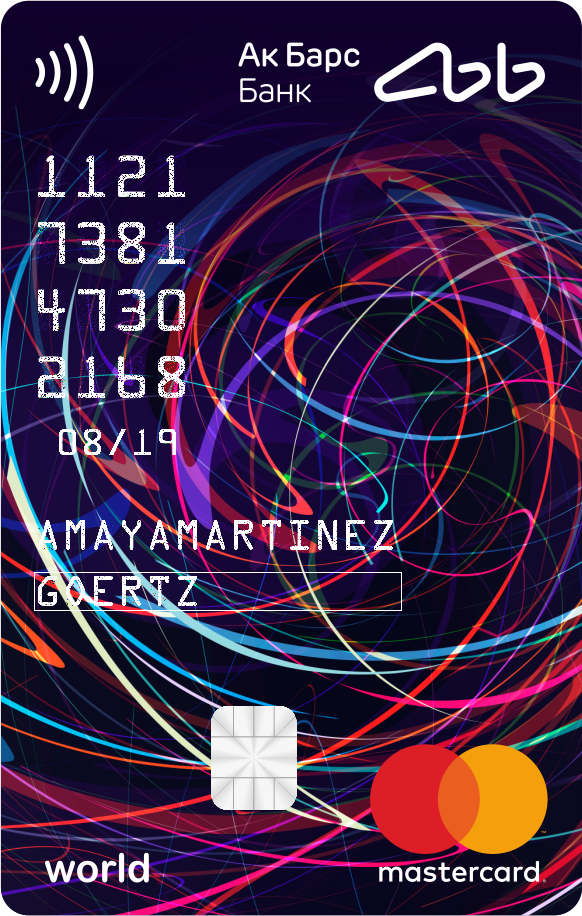

In [20]:
draw_rectangle(im1, fname_box)

In [21]:
def crop(image, cx, cy):
    image = image.copy()
    x, y = image.size
    dx, dy = int(x/cx), int(y/cy)
    cim = []
    for i in range(cy):  
        for j in range(cx):
            cim.append(image.crop((j*dx, i*dy, dx*(j+1), dy*(i+1))))
            cim[-1] = cim[-1].resize((244, 244),Image.ANTIALIAS)
#             display(cim[-1])
    return cim

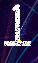

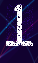

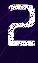

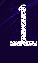

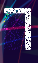

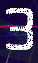

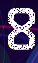

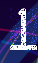

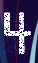

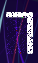

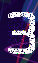

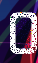

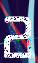

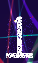

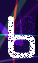

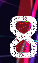

1121738147302168


In [168]:
image = im1.copy()
x, y = image.size
box = number_box
ims = crop(image.crop((int(x*box['xl']), int(y*box['yu']), int(x*box['xr']), int(y*box['yd']))), 4, 4)
print(train['card_number'][188])

In [22]:
train = pd.read_csv('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\train.csv')

In [23]:
train.dtypes

card_number     int64
date_expire    object
filename       object
first_name     object
last_name      object
dtype: object

In [24]:
train[:5]

card_number date_expire filename first_name last_name
0  1442152549078095       05/21    0.png  daveontae      wife
1  2332413711147225       04/20    1.png    mongkol    vilane
2  2009659898647744       04/19    2.png     ranell   dolnick
3  1291240304972980       08/20    3.png     ariena   obnegon
4  1521699837379464       08/20    4.png   gentiana   belrose

In [65]:
train[['card_number']] = train[['card_number']].astype(object)

In [78]:
max_len = 0
name = ''
num_image = ''
for i in range(len(train)):
#     max_len = max(max_len, max(len(train['last_name'][i]), len(train['last_name'][i])))
    if len(train['first_name'][i]) > max_len:
        name = train['first_name'][i]
        max_len = len(train['first_name'][i])
        num_image = train['filename'][i]
print(max_len, name, num_image)

13 amayamartinez 188.png


In [9]:
fpath = 'C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\crreal\\'
alpabet = '-abcdefghijklmnopqrstuvwxyz0123456789'
#train folders
if 'train' not in os.listdir(fpath):
    os.mkdir(fpath+'train')
for i in range(len(alpabet)):
    if alpabet[i] not in os.listdir(fpath+'train'):
        os.mkdir(fpath+'train\\'+alpabet[i])
#test folders
if 'test' not in os.listdir(fpath):
    os.mkdir(fpath+'test')
for i in range(len(alpabet)):
    if alpabet[i] not in os.listdir(fpath+'test'):
        os.mkdir(fpath+'test\\'+alpabet[i])
        
#val folder

if 'val' not in os.listdir(fpath):
    os.mkdir(fpath+'val')
for i in range(len(alpabet)):
    if alpabet[i] not in os.listdir(fpath+'val'):
        os.mkdir(fpath+'val\\'+alpabet[i])

In [28]:
for i in range(200):
    stage = ''
    if(random.random() > 0.8):
        stage = 'val\\'
    else:
        stage = 'train\\'
    print(i, stage)
    
    im = Image.open('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\real\\train\\'+train['filename'][i])
    x, y = im.size
#     numbers = crop(im.crop((int(x*number_box['xl']), int(y*number_box['yu']), 
#                                int(x*number_box['xr']), int(y*number_box['yd']))), 4, 4)
#     for nim in range(len(numbers)):
#         numbers[nim].save(fpath+stage+str(train['card_number'][i])[nim]+'\\'+id_generator()+'.png')
        
#     date = crop(im.crop((int(x*date_box['xl']), int(y*date_box['yu']), 
#                            int(x*date_box['xr']), int(y*date_box['yd']))), 5, 1)
#     for nim in range(len(date)):
#         if(str(train['date_expire'][i])[nim] != '/'):
#             date[nim].save(fpath+stage+str(train['date_expire'][i])[nim]+'\\'+id_generator()+'.png')
            
#     first_name = crop(im.crop((int(x*name_box['xl']), int(y*name_box['yu']), 
#                            int(x*name_box['xr']), int(y*name_box['yd']))), 13, 1)
#     for nim in range(len(train['first_name'][i])):
#         first_name[nim].save(fpath+stage+str(train['first_name'][i])[nim]+'\\'+id_generator()+'.png')
        
#     last_name = crop(im.crop((int(x*fname_box['xl']), int(y*fname_box['yu']), 
#                            int(x*fname_box['xr']), int(y*fname_box['yd']))), 13, 1)
#     for nim in range(len(train['last_name'][i])):
#         last_name[nim].save(fpath+stage+str(train['last_name'][i])[nim]+'\\'+id_generator()+'.png')

    first_name = crop(im.crop((int(x*name_box['xl']), int(y*name_box['yu']), 
                           int(x*name_box['xr']), int(y*name_box['yd']))), 13, 1)
    for nim in range(13 - len(train['first_name'][i])):
        first_name[nim + len(train['first_name'][i])].save(fpath+stage+'-'+'\\'+id_generator()+'.png')
        
    last_name = crop(im.crop((int(x*fname_box['xl']), int(y*fname_box['yu']), 
                           int(x*fname_box['xr']), int(y*fname_box['yd']))), 13, 1)
    for nim in range(13-len(train['last_name'][i])):
        last_name[nim+len(train['last_name'][i])].save(fpath+stage+'-'+'\\'+id_generator()+'.png')
    

0 train\
1 train\
2 train\
3 train\
4 train\
5 train\
6 train\
7 train\
8 train\
9 train\
10 train\
11 val\
12 train\
13 train\
14 train\
15 train\
16 train\
17 train\
18 val\
19 val\
20 val\
21 train\
22 train\
23 train\
24 train\
25 train\
26 train\
27 train\
28 train\
29 train\
30 train\
31 train\
32 train\
33 val\
34 train\
35 train\
36 train\
37 train\
38 train\
39 train\
40 val\
41 train\
42 train\
43 val\
44 val\
45 train\
46 train\
47 train\
48 val\
49 train\
50 train\
51 train\
52 train\
53 train\
54 train\
55 val\
56 val\
57 val\
58 train\
59 train\
60 train\
61 train\
62 val\
63 train\
64 train\
65 val\
66 train\
67 train\
68 train\
69 train\
70 val\
71 train\
72 val\
73 train\
74 train\
75 val\
76 train\
77 train\
78 train\
79 train\
80 val\
81 val\
82 train\
83 train\
84 train\
85 val\
86 train\
87 train\
88 train\
89 train\
90 train\
91 train\
92 train\
93 train\
94 train\
95 val\
96 train\
97 val\
98 train\
99 train\
100 val\
101 val\
102 train\
103 train\
104 train\
105

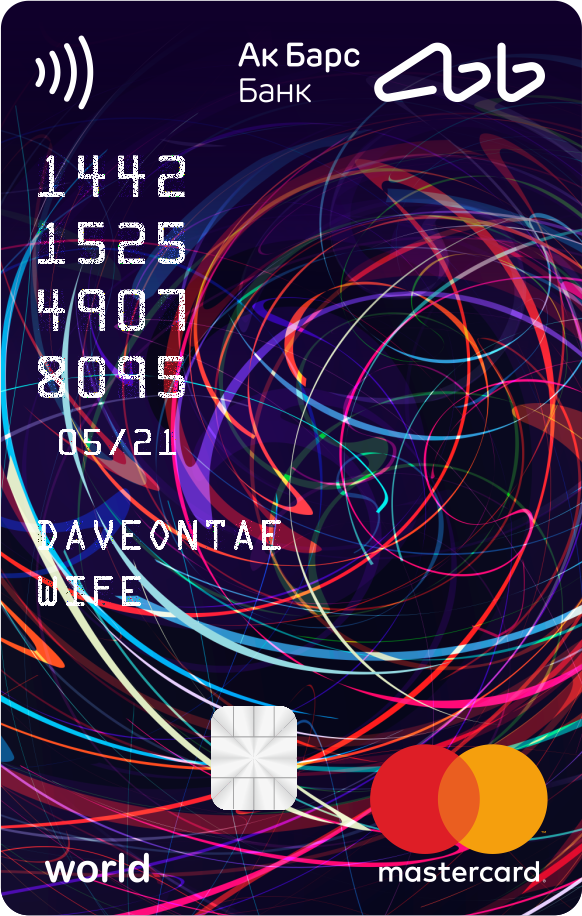

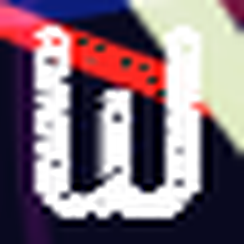

w


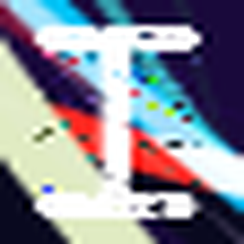

i


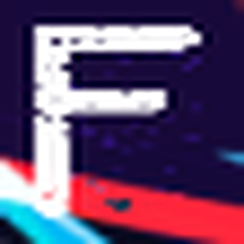

f


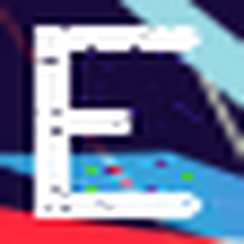

e


In [216]:
im = Image.open('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\real\\train\\test\\'+train['filename'][0])
display(im)
x, y = im.size
last_name = crop(im.crop((int(x*fname_box['xl']), int(y*fname_box['yu']), 
                           int(x*fname_box['xr']), int(y*fname_box['yd']))), 13, 1)
for nim in range(len(train['last_name'][0])):
#     numbers[nim].save(fpath+'train\\'+str(train['card_number'][0])[nim]+'\\'+id_generator()+'.png')
    display(last_name[nim])
    print(train['last_name'][0][nim])

In [310]:
def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=np.float)
    B = np.array(pb).reshape(8)

    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)

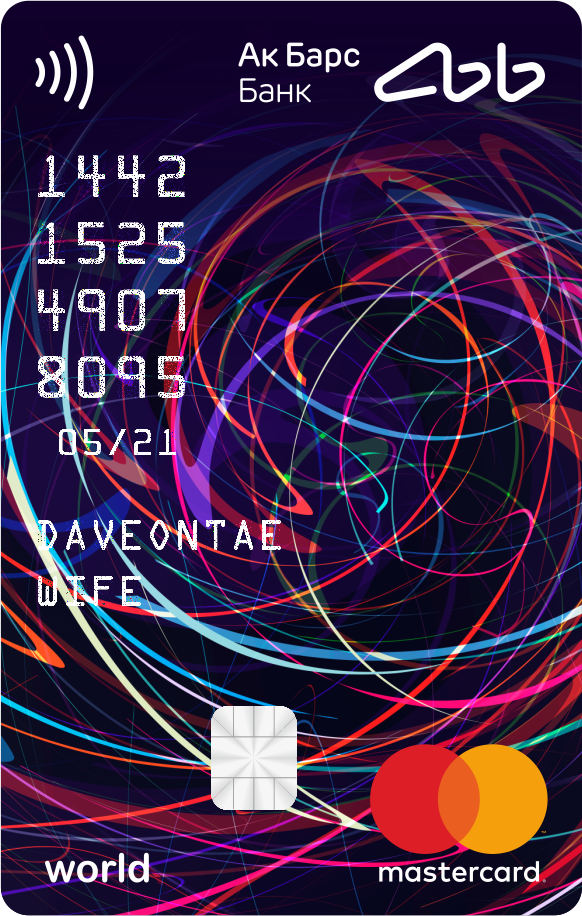

In [328]:
img = Image.open('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\real\\train\\'+train['filename'][0])
width, height = img.size
m = 0
n = 0.1
xshift = abs(m) * width
yshift = abs(n) * height
new_width = width + int(round(xshift))
new_height = height + int(round(yshift))
img = img.transform((new_width, height), Image.AFFINE,
        (1, m, -xshift if m > 0 else 0, 0, 1, 0), Image.BICUBIC)
display(img)

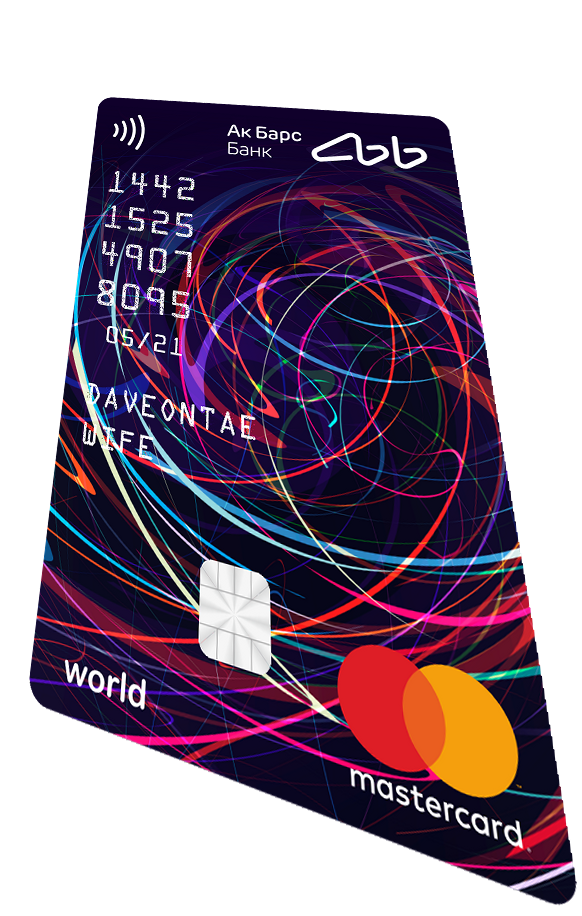

In [330]:
coeffs = find_coeffs(
        [(0, 0), (img.size[0], 0), (img.size[0], img.size[1]), (0, img.size[1])],
        [(-200, -200), (img.size[0]+100,-100), (img.size[0], img.size[1]), (0, img.size[1]+100)])


nback = background.copy()

img = img.transform((width, height), Image.PERSPECTIVE, coeffs, Image.BICUBIC)
# rec = ImageDraw.Draw(img)
# rec.polygon([(0, 0), (img.size[0],0), (img.size[0], img.size[1]), (-100, img.size[1]+100)])
# display(nback.paste(img, mask=img))
display(img)
# display(nback)

In [32]:
rimage_path = 'C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\random images'
background_names = os.listdir(rimage_path)

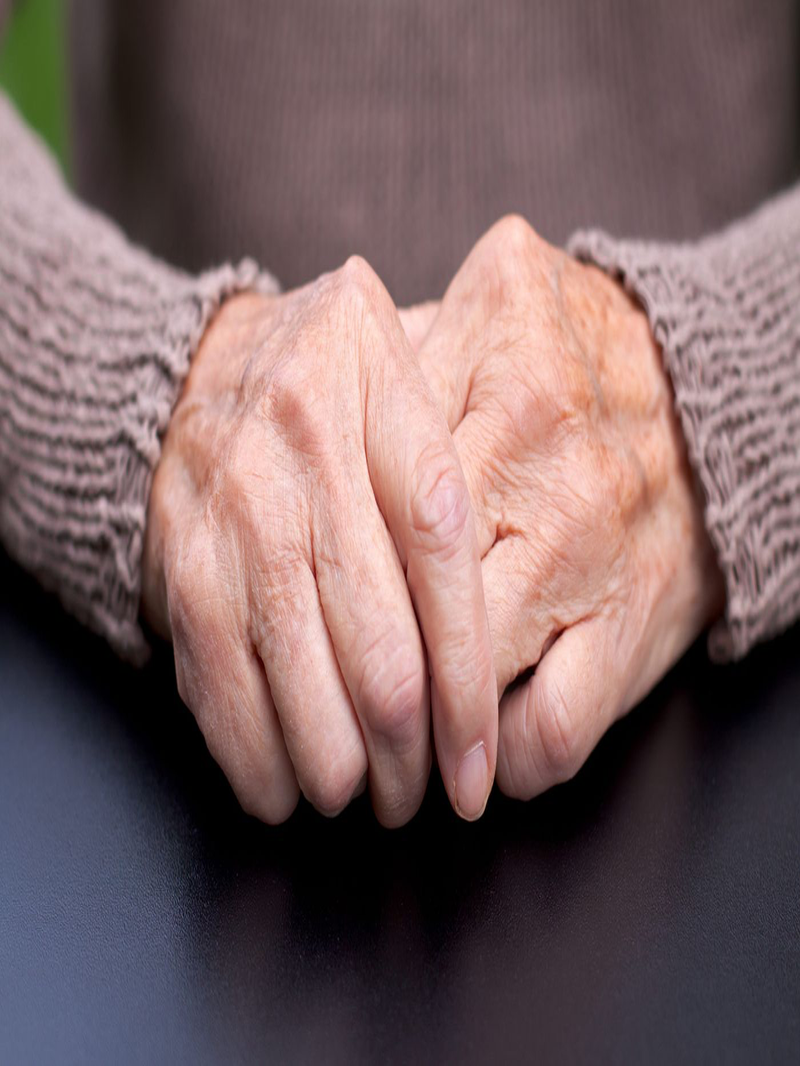

In [97]:
img = Image.open('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\real\\train\\test\\'+train['filename'][1])
# back2 = Image.open(rimage_path + '\\' + background_names[random.randint(0, len(background_names))]).resize((1000, 1500), Image.ANTIALIAS)
background = Image.open(rimage_path + '\\' + background_names[random.randint(0, len(background_names))])
background = background.resize((800, 1066), Image.ANTIALIAS)
# background.paste(img.transform((width, height), Image.PERSPECTIVE, coeffs, Image.BICUBIC), mask=img.transform((width, height), Image.PERSPECTIVE, coeffs, Image.BICUBIC))
display(background)

In [165]:
def create_random_pasted_image(img, background):
    img = img.copy()
    img_size = img.size
    background = background.copy()
    points, labels = [], []
    for i in range(4):
        points.append([random.randint(-35, 35), random.uniform(-0.4, -0.1)])
    labels.append([0,0])
    labels.append([img_size[0], 0])
    labels.append([img_size[0], img_size[1]])
    labels.append([0, img_size[1]])
#     coeffs = find_coeffs(
#     [(0, 0), (img.size[0], 0), (img.size[0], img.size[1]), (0, img.size[1])],
#     [(-points[0][0], -points[0][1]), (img.size[0]+points[1][0], -points[1][1]), 
#      (img.size[0]+points[2][0], img.size[1]+points[2][1]), (-points[3][0], img.size[1]+points[3][1])])
#     coeffs = find_coeffs(
#     [(0, 0), (img.size[0], 0), (img.size[0], img.size[1]), (0, img.size[1])],
#     [(-points[0][0], -points[0][1]), (img.size[0], 0), (img.size[0], img.size[1]), (0, img.size[1])])
#     print(coeffs)
#     points[0][0] = -get_normal_x(coeffs, 0.0, 0.0)
#     points[0][1] = -get_normal_y(coeffs, 0.0, 0.0)
#     points[1][0] = -get_normal_x(coeffs, img_size[0], 0.0)
#     points[1][1] = -get_normal_y(coeffs, img_size[0], 0.0)
#     points[2][0] = get_normal_x(coeffs, img_size[0], img_size[1])
#     points[2][1] = get_normal_y(coeffs, img_size[0], img_size[1])
#     points[3][0] = get_normal_x(coeffs, 0.0, img_size[1])
#     points[3][1] = get_normal_y(coeffs, 0.0, img_size[1])
#     img = img.transform((img.size[0], img.size[1]), Image.PERSPECTIVE, coeffs, Image.BICUBIC)
#     img = img.rotate(points[0][0], expand=1, resample=Image.BICUBIC)
    shitx, shity = int(img.size[0]*(1.0+points[0][1])), int(img.size[1]*(1.0+points[1][1]))
    img = img.resize((shitx, shity), Image.ANTIALIAS)
    labels[1][0], labels[3][1], labels[2][0], labels[2][1] = shitx, shity, shitx, shity
    
    
    offsetx, offsety = random.randint(-50, 50), random.randint(-50, 50) 
#     offsetx, offsety = 0, 0
    for i in range(4):
        labels[i][0] += (background.size[0] - img_size[0])//2 + offsetx
        labels[i][1] += (background.size[1] - img_size[1])//2 + offsety
    
    background.paste(img,((background.size[0] - img_size[0])//2 +offsetx, 
                          (background.size[1] - img_size[1])//2 + offsety) , mask=img)
#     background.paste(img, mask=img)
    return background, labels

[[28, -296], [471, -296], [471, 368], [28, 368]]


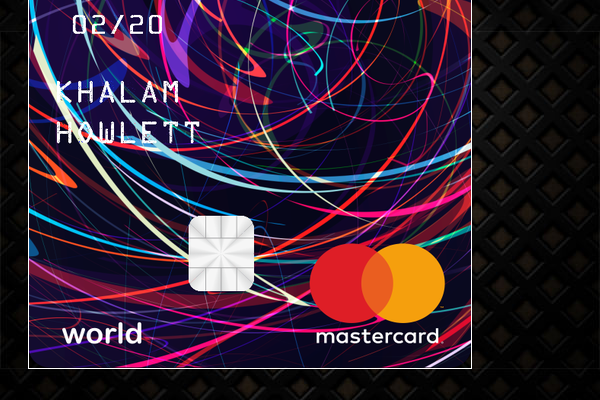

In [274]:
pasted_im, points = create_random_pasted_image(img, background)
print(points)
rec = ImageDraw.Draw(pasted_im)
rec.polygon([points[0][0], points[0][1], points[1][0], points[1][1],
                                              points[2][0], points[2][1], points[3][0], points[3][1]])
display(pasted_im)

In [264]:
def get_corner_crop(img, labelz):
    print(labelz)
    labelz = labelz.copy()
    img = img.copy()
    imgs = img.size
    img = img.resize((min(imgs[0], imgs[1]), min(imgs[0], imgs[1])), Image.BICUBIC)
    for i in range(len(labelz)):
        labelz[i][0] = int(labelz[i][0]*(img.size[0]/imgs[0]))
        labelz[i][1] = int(labelz[i][1]*(img.size[1]/imgs[1]))

    imgs = img.size
    corners = []
    corners.append(img.crop((0,0, imgs[0]//2, imgs[1]//2)))
    corners.append(img.crop((imgs[0]//2, 0, imgs[0], imgs[1]//2)))
    labelz[1][0] = labelz[1][0] - imgs[0]//2
#     corners[-1] = corners[-1].rotate(90)
#     labelz[1][0] = 
    corners.append(img.crop((imgs[0]//2, imgs[1]//2, imgs[0], imgs[1])))
    labelz[2][0], labelz[2][1] = labelz[2][0] - imgs[0]//2, labelz[2][1] - imgs[1]//2
#     corners[-1] = corners[-1].rotate(180)
    corners.append(img.crop((0, imgs[1]//2, imgs[0]//2, imgs[1])))
    labelz[3][1] = labelz[3][1] - imgs[1]//2
#     corners[-1] = corners[-1].rotate(270)
    
    return corners, labelz

In [265]:
def get_normal_x(c, x, y):
    return (c[0]*x + c[1]*y + c[2])/(c[6]*x + c[7]*y + 1.0)
def get_normal_y(c, x, y):
    return (c[3]*x + c[4]*y + c[5])/(c[6]*x + c[7]*y + 1.0)

[[66, 27], [463, 27], [463, 611], [66, 611]]
[[66, 20], [63, 20], [63, 58], [66, 58]]


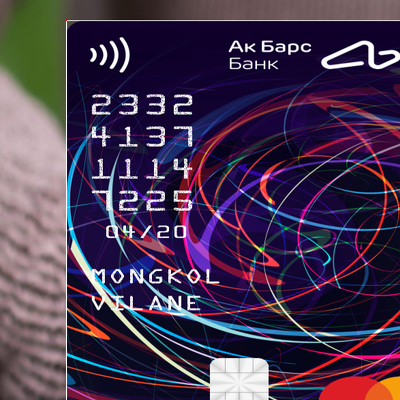

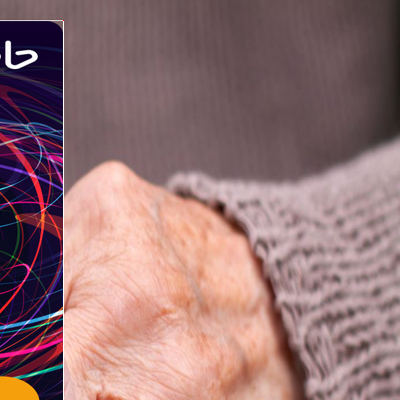

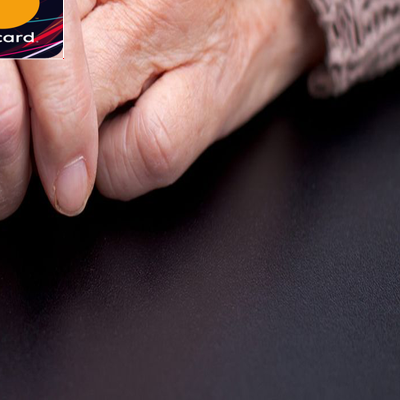

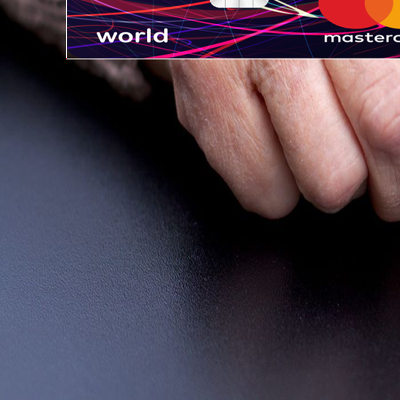

In [266]:
cornerz = get_corner_crop(pasted_im, points)
print(cornerz[1])
for i in range(len(cornerz[0])):
    point = ImageDraw.Draw(cornerz[0][i])
    point.point((cornerz[1][i][0], cornerz[1][i][1]), 'red', )
    display(cornerz[0][i])

In [306]:
dx, dy = 255, 255
link_background = 'C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\random images'
link_names = 'C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\real\\train'
background_names = os.listdir(link_background)
card_names = os.listdir(link_names)
df_cor = pd.DataFrame(columns=['loc', 'x', 'y'])
for i in range(200):
    print('creating ' + str(i))
    background = Image.open(link_background+'\\'+background_names[random.randint(0, len(background_names)-1)])
    background = background.resize((800, 1066), Image.ANTIALIAS)
    img = Image.open(link_names+'\\'+card_names[random.randint(0, len(card_names)-1)])
    pasted_im, points = create_random_pasted_image(img, background)
    cornerz = get_corner_crop(pasted_im, points)
#     print(cornerz[1])
    for i in range(len(cornerz[0])):
        cor_name = id_generator() + '.png'
        cornerz[0][i].save('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\corners\\'+cor_name)
        df_cor.loc[len(df_cor)] = [cor_name, cornerz[1][i][0], cornerz[1][i][1]]
#         point = ImageDraw.Draw(cornerz[0][i])
#         point.point((cornerz[1][i][0], cornerz[1][i][1]), 'red')
#         display(cornerz[0][i])

creating 0
[[122, 72], [545, 72], [545, 656], [122, 656]]
creating 1
[[136, 45], [496, 45], [496, 730], [136, 730]]
creating 2
[[67, 111], [557, 111], [557, 717], [67, 717]]
creating 3
[[90, 92], [446, 92], [446, 883], [90, 883]]
creating 4
[[111, 71], [576, 71], [576, 625], [111, 625]]
creating 5
[[110, 71], [484, 71], [484, 822], [110, 822]]
creating 6
[[75, 107], [513, 107], [513, 884], [75, 884]]
creating 7
[[83, 88], [531, 88], [531, 822], [83, 822]]
creating 8
[[129, 31], [507, 31], [507, 703], [129, 703]]
creating 9
[[110, 47], [534, 47], [534, 861], [110, 861]]
creating 10
[[73, 85], [491, 85], [491, 712], [73, 712]]
creating 11
[[93, 42], [508, 42], [508, 739], [93, 739]]
creating 12
[[153, 33], [545, 33], [545, 588], [153, 588]]
creating 13
[[119, 41], [568, 41], [568, 837], [119, 837]]
creating 14
[[124, 31], [589, 31], [589, 707], [124, 707]]
creating 15
[[126, 100], [555, 100], [555, 844], [126, 844]]
creating 16
[[116, 80], [546, 80], [546, 882], [116, 882]]
creating 17
[

[[121, 27], [474, 27], [474, 708], [121, 708]]
creating 140
[[149, 32], [667, 32], [667, 644], [149, 644]]
creating 141
[[140, 34], [589, 34], [589, 607], [140, 607]]
creating 142
[[68, 49], [499, 49], [499, 732], [68, 732]]
creating 143
[[138, 29], [601, 29], [601, 765], [138, 765]]
creating 144
[[127, 74], [531, 74], [531, 728], [127, 728]]
creating 145
[[155, 63], [650, 63], [650, 690], [155, 690]]
creating 146
[[141, 61], [543, 61], [543, 658], [141, 658]]
creating 147
[[95, 38], [518, 38], [518, 709], [95, 709]]
creating 148
[[128, 58], [603, 58], [603, 820], [128, 820]]
creating 149
[[98, 104], [607, 104], [607, 696], [98, 696]]
creating 150
[[123, 79], [499, 79], [499, 856], [123, 856]]
creating 151
[[93, 49], [540, 49], [540, 741], [93, 741]]
creating 152
[[132, 64], [595, 64], [595, 634], [132, 634]]
creating 153
[[142, 88], [643, 88], [643, 651], [142, 651]]
creating 154
[[126, 26], [477, 26], [477, 813], [126, 813]]
creating 155
[[77, 74], [589, 74], [589, 626], [77, 626]]
c

In [300]:
len(df_cor)

800

In [308]:
df_cor.to_csv('C:\\Users\\Dinmuhametov Salavat\\Desktop\\ak_bars\\corners\\data.csv')

In [307]:
df_cor.head()

loc    x   y
0  5p9w9l.png  122  54
1  wvzmyg.png  145  54
2  y5tpxi.png  145  92
3  6xywoj.png  122  92
4  auixef.png  136  33